# Data Visualizations
Cassady Jackson and Baylie Schnieder

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import re
from collections import Counter

In [6]:
top_ten = pd.read_csv('TopTenStates.csv')
bottom_ten = pd.read_csv('BottomTen.csv')

## Bar Plot for States with Highest Ranking vs Rate of Cardiovascular Disease

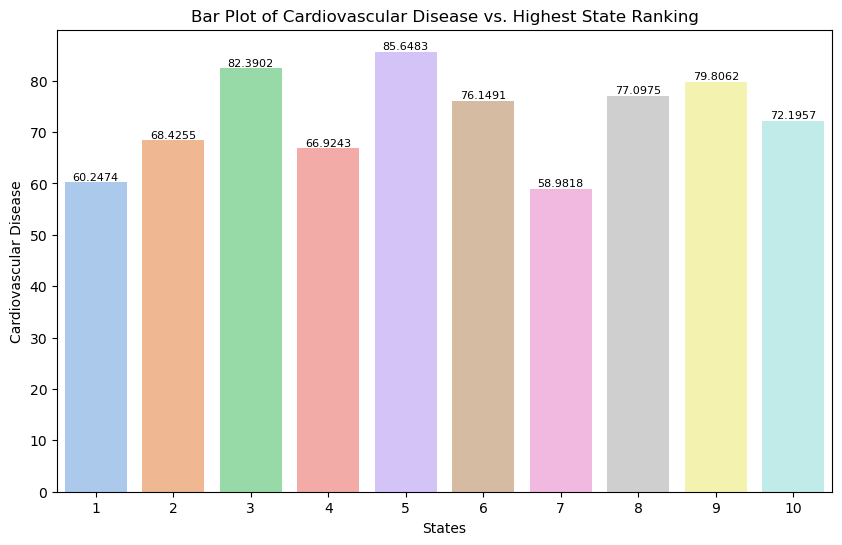

In [16]:
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
ax = sns.barplot(x=top_ten['Overall Public School Rank 2021'], y=top_ten['DataValue'], errorbar=None, palette='pastel', hue=top_ten['Overall Public School Rank 2021'], legend=False)
plt.title('Bar Plot of Cardiovascular Disease vs. Highest State Ranking')
plt.xlabel('States')
plt.ylabel('Cardiovascular Disease')
plt.grid(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
plt.savefig('top_10_rates.jpg', dpi=300)
plt.show()

### Bar Plot for States with Lowest Ranking vs Cardiovascular Disease

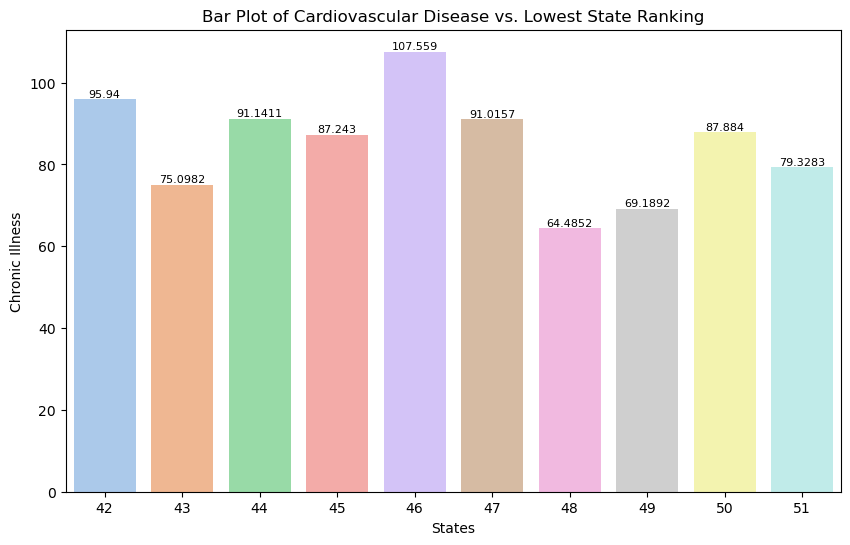

In [19]:
#bottom_ten = bottom_ten.groupby('Overall Public School Rank 2022')
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
ax = sns.barplot(x=bottom_ten['Overall Public School Rank 2021'], y=bottom_ten['DataValue'], errorbar=None, palette='pastel', hue=bottom_ten['Overall Public School Rank 2021'], legend=False)
plt.title('Bar Plot of Cardiovascular Disease vs. Lowest State Ranking')
plt.xlabel('States')
plt.ylabel('Chronic Illness')
plt.grid(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
plt.savefig('bottom_10_rates.jpg', dpi=300)
plt.show()

In [21]:
state_data = pd.read_csv('State_Unique_Data.csv')

In [23]:
def bottom_25(state):
    if state <= 25:
        return 'Top'
    else:
        return 'Bottom'

state_data['Ranking Level'] = state_data['Overall Public School Rank 2021'].apply(bottom_25)

display(state_data.head(1))

,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2021,Higher Ed Quality 2021,School Safety Rank 2021,Ranking Level
0,2019,AK,Alaska,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Age-adjusted Rate,159.7,159.7,...,2,CVD,CVD09,AGEADJRATE,SEX,SEXM,48,50,34,Bottom


In [25]:
bottom_data = state_data.copy()
bottom_data = bottom_data.drop(bottom_data[bottom_data['Ranking Level'] != 'Bottom'].index)
display(bottom_data.head(1))

,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2021,Higher Ed Quality 2021,School Safety Rank 2021,Ranking Level
0,2019,AK,Alaska,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Age-adjusted Rate,159.7,159.7,...,2,CVD,CVD09,AGEADJRATE,SEX,SEXM,48,50,34,Bottom


In [27]:
top_data = state_data.copy()
top_data = top_data.drop(top_data[top_data['Ranking Level'] != 'Top'].index)

In [29]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    return text.strip()

bottom_data['cleaned_topic'] = bottom_data['Topic'].apply(preprocess_text)
bottom_data = bottom_data.drop_duplicates()

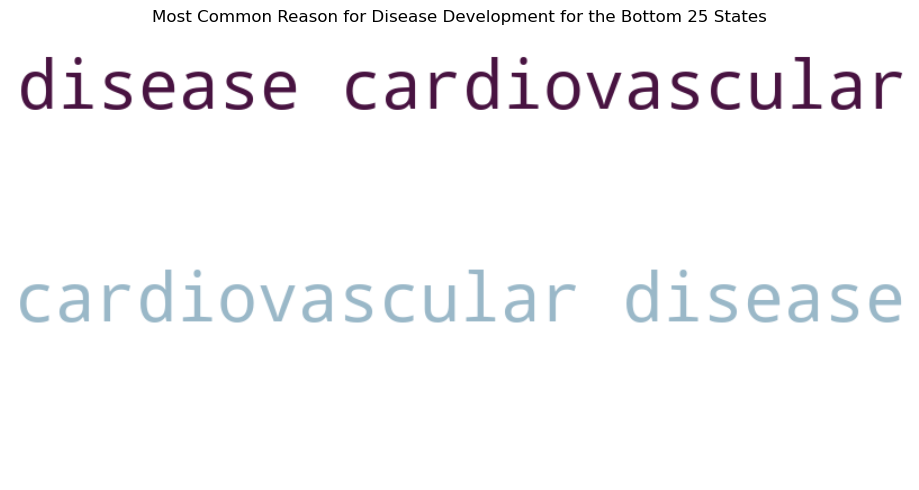

In [31]:
alltext = ' '.join(bottom_data['cleaned_topic'])

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    colormap='twilight_shifted',
).generate(alltext)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Reason for Disease Development for the Bottom 25 States')
plt.tight_layout()
plt.savefig('bottom_25_reasonings.jpg', dpi=300)
plt.show()

In [33]:
top_data['cleaned_topic'] = top_data['Topic'].apply(preprocess_text)
top_data = top_data.drop_duplicates()

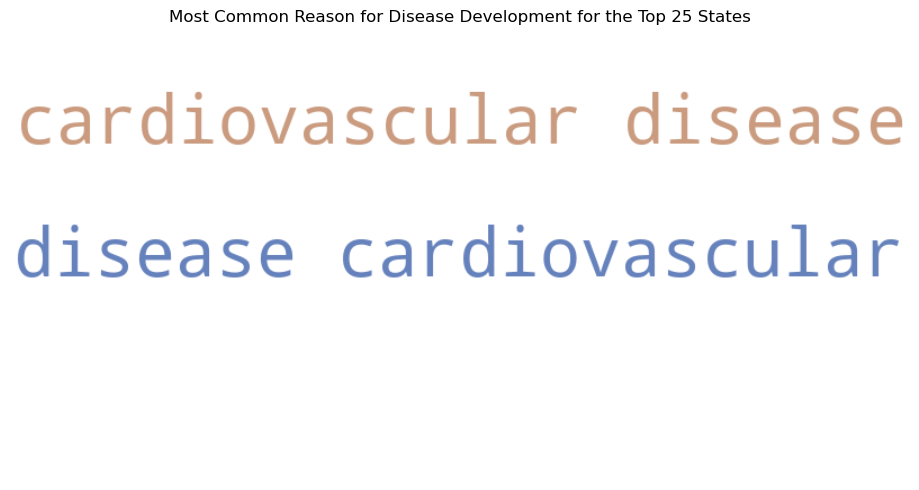

In [35]:
all_text = ' '.join(top_data['cleaned_topic'])

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    colormap='twilight_shifted',
).generate(alltext)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Reason for Disease Development for the Top 25 States')
plt.tight_layout()
plt.savefig('top_25_reasonings.jpg', dpi=300)
plt.show()